In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from dataprep import DataPrep
from unet_arch import build_unet
import tensorflow as tf

%matplotlib inline

In [2]:
train_dir_path = 'data\\cityscapes_data\\train'
val_dir_path = 'data\\cityscapes_data\\val'

In [3]:
prepobj = DataPrep(train_dir_path,val_dir_path)

In [4]:
x_train, y_train = prepobj.create_dataset(train_dir_path)
x_val, y_val = prepobj.create_dataset(val_dir_path)


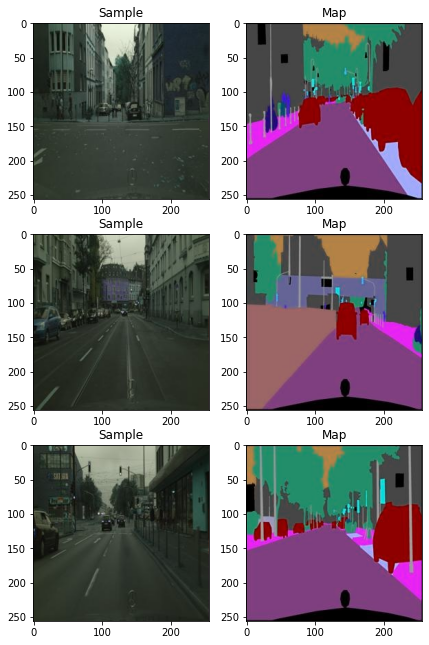

In [5]:
plt.figure(figsize = (7,11))
for i in range(1,7):
    plt.subplot(3,2,i)
    if i%2 == 0:
        plt.title('Map')
        plt.imshow(y_train[i])
    else:
        plt.title('Sample')
        plt.imshow(x_train[i])

In [6]:
print('Train size: ',len(x_train), '\nValidation size: ', len(x_val))

Train size:  2975 
Validation size:  3474


In [7]:
input_shape = x_train[0].shape
model = build_unet(input_shape = input_shape)

In [8]:
#model.summary()

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
results = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5


c:\users\saumi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(
